In [1]:
#Bigram model on names.txt as sample data

In [2]:
words = open('names.txt','r').read().splitlines()

In [3]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [4]:
min(len(w) for w in words)

2

In [5]:
max(len(w) for w in words)

15

In [6]:
import torch
N = torch.zeros((27,27), dtype=torch.int32)

In [7]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0

itos = {i:s for s,i in stoi.items()}


In [8]:
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [9]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1,ix2] += 1

(-0.5, 26.5, 26.5, -0.5)

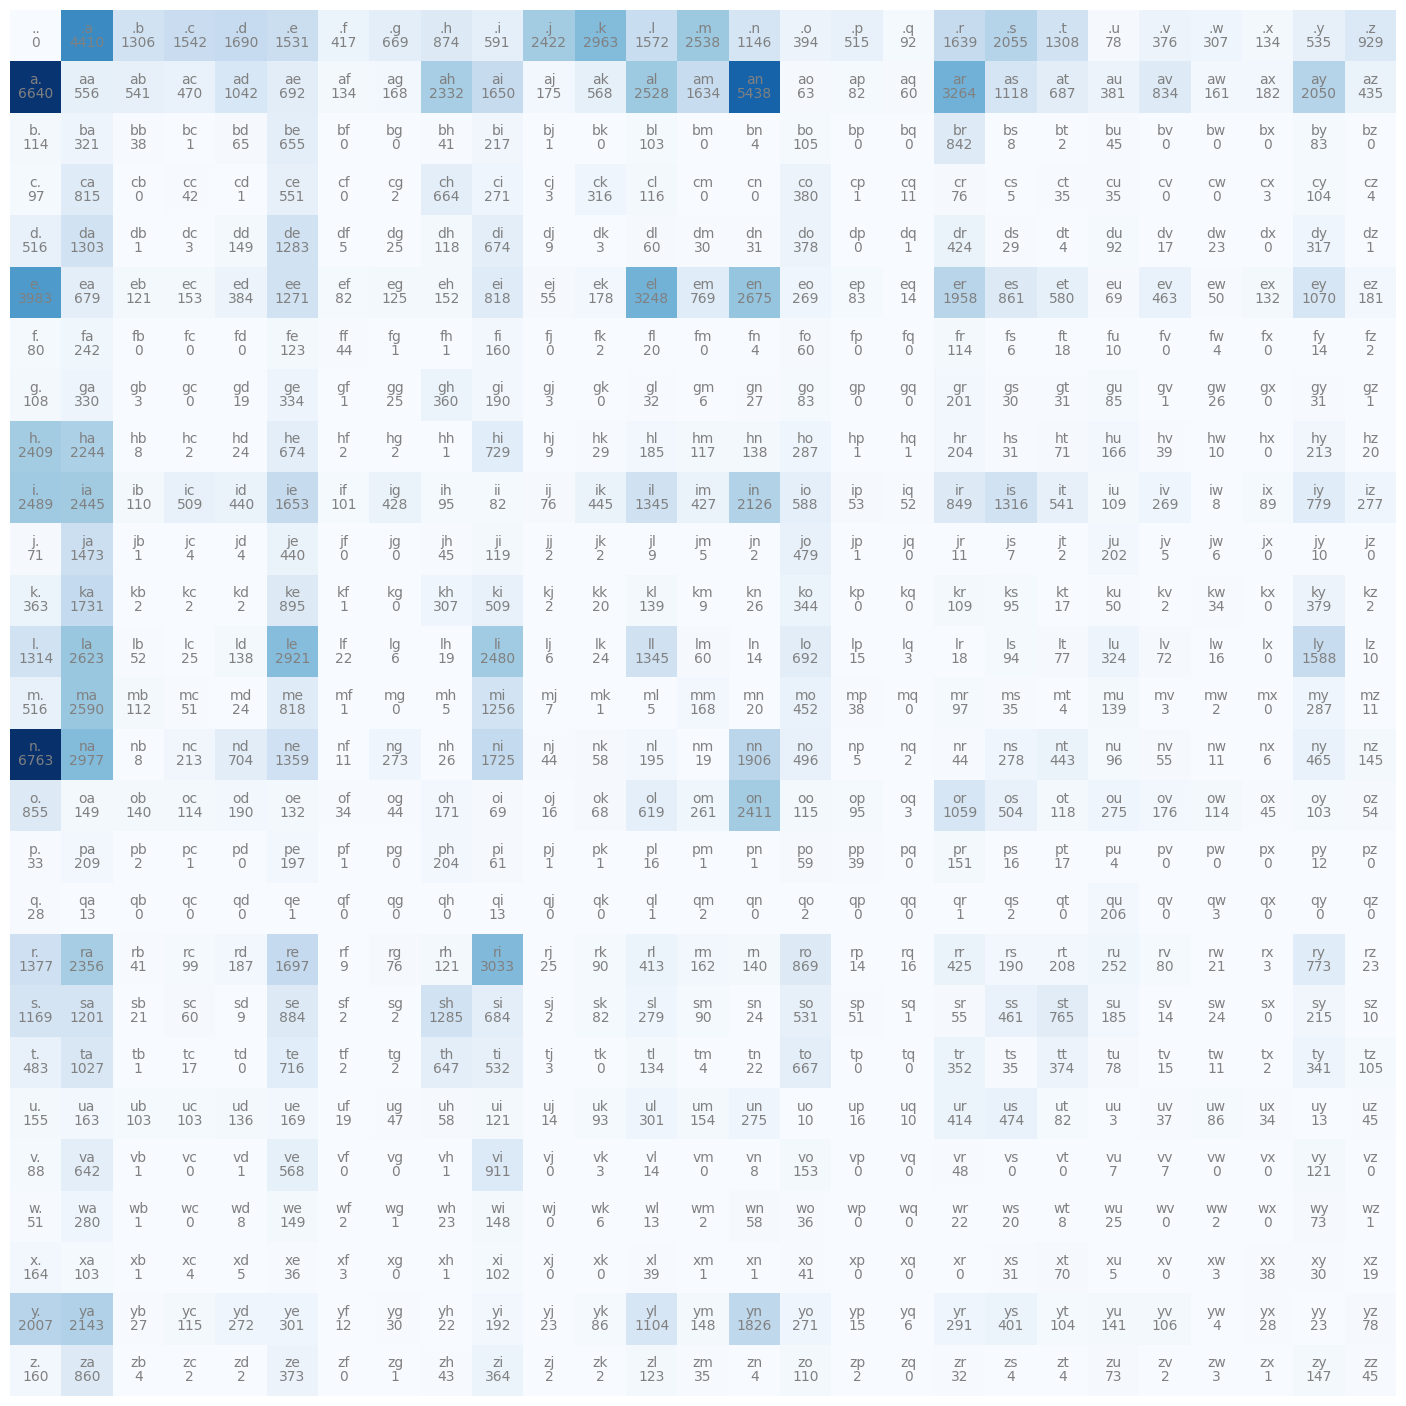

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(18,18))
plt.imshow(N,cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i]+ itos[j]
        plt.text(j,i,chstr, ha='center', va='bottom', color='gray')
        plt.text(j,i, N[i,j].item(), ha='center',va='top', color='gray')

plt.axis('off')
        
    

In [11]:
p= N[0].float()
p = p/p.sum()

In [12]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p,num_samples=1, replacement=True, generator=g)
ix

tensor([13])

In [13]:
P = N.float()
P /= P.sum(1,keepdims=True)
P.shape

torch.Size([27, 27])

In [14]:
g = torch.Generator().manual_seed(2147483647)

for x in range(50):
    ix=0
    out = []
    while True:
        p= P[ix]
        ix = torch.multinomial(p,num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.
odaren.
iaddash.
h.
jhinatien.
egushl.
h.
br.
a.
jayn.
ilemannariaenien.
be.
f.
akiinela.
trttanakeroruceyaaxatona.
lamoynayrkiedengin.
torrederahnn.
ellovyllobrpin.
a.
wai.
kn.
jaieendenelele.
kianu.
eryly.
zeeieil.
kayvirgiynenn.
r.
t.
rja.
kronanurolin.
din.
elfr.
dikie.
s.
elarieiavelvalllaish.
eythann.
janianaeri.
ble.
ckiree.
l.
adgenoena.
naisaryan.
sialaitalyee.
cena.
lisarr.
bizyngor.


In [15]:
log_likelihood = 0
n = 0
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1 =  stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1,ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
#         print(f'{ch1}{ch2} : {prob:4f}{logprob:4f}')
print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')
            


log_likelihood=tensor(-559891.7500)
nll=tensor(559891.7500)
2.454094171524048


In [16]:
# create the tranng set of Biagrams

In [17]:
xs, ys = [], []
for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1 =  stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
xs

tensor([ 0,  5, 13, 13,  1])

In [18]:
xs.dtype

torch.int64

In [19]:
#ont hot encodng of integers

In [20]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [21]:
xenc.shape

torch.Size([5, 27])

In [22]:
xenc.dtype

torch.float32

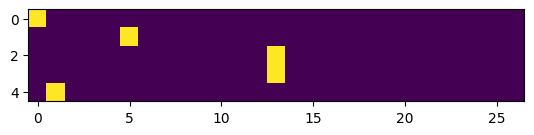

In [23]:
plt.imshow(xenc)

In [24]:
W = torch.randn((27,27))
xenc @ W

tensor([[ 0.9770,  0.2600, -0.6135,  0.4670,  0.2830,  1.1928,  0.9070, -0.3969,
         -2.5662, -0.9147,  0.7506,  1.0237, -0.6800,  2.7325, -1.8418,  0.2641,
         -1.2723, -0.2395, -1.6965, -4.0124, -0.2627,  1.0234,  0.8559, -1.8369,
          0.1685,  0.2414, -0.0185],
        [ 0.0416,  0.9717,  1.2407, -0.2122, -1.1398, -1.2242, -0.8539, -0.4161,
          0.3804, -0.0427,  2.6836, -0.5869, -1.0789, -0.0860, -0.2603, -2.5330,
          0.9621, -0.7499, -0.6742,  0.4176, -1.3365, -0.5026,  0.3127,  0.3798,
          0.2441, -0.6511,  0.4836],
        [-0.3864,  0.2747,  0.2097,  2.2406,  0.3848,  0.9678,  1.6380,  1.4441,
         -1.4932,  0.9002, -1.3859,  0.7427,  0.4119,  1.2469, -0.2491, -2.1209,
          0.0084,  0.1622,  0.5546, -0.4257, -0.6935, -0.5676, -0.5352, -0.0135,
          0.0329, -1.8745,  0.0164],
        [-0.3864,  0.2747,  0.2097,  2.2406,  0.3848,  0.9678,  1.6380,  1.4441,
         -1.4932,  0.9002, -1.3859,  0.7427,  0.4119,  1.2469, -0.2491, -2.1209

In [25]:
logits = (xenc @ W)
counts = logits.exp()
probs = counts/ counts.sum(1,keepdims=True)
probs

tensor([[0.0561, 0.0274, 0.0114, 0.0337, 0.0280, 0.0696, 0.0523, 0.0142, 0.0016,
         0.0085, 0.0447, 0.0588, 0.0107, 0.3246, 0.0033, 0.0275, 0.0059, 0.0166,
         0.0039, 0.0004, 0.0162, 0.0588, 0.0497, 0.0034, 0.0250, 0.0269, 0.0207],
        [0.0251, 0.0635, 0.0831, 0.0194, 0.0077, 0.0071, 0.0102, 0.0159, 0.0352,
         0.0230, 0.3518, 0.0134, 0.0082, 0.0221, 0.0185, 0.0019, 0.0629, 0.0114,
         0.0122, 0.0365, 0.0063, 0.0145, 0.0329, 0.0351, 0.0307, 0.0125, 0.0390],
        [0.0146, 0.0283, 0.0265, 0.2023, 0.0316, 0.0567, 0.1107, 0.0912, 0.0048,
         0.0530, 0.0054, 0.0452, 0.0325, 0.0749, 0.0168, 0.0026, 0.0217, 0.0253,
         0.0375, 0.0141, 0.0108, 0.0122, 0.0126, 0.0212, 0.0222, 0.0033, 0.0219],
        [0.0146, 0.0283, 0.0265, 0.2023, 0.0316, 0.0567, 0.1107, 0.0912, 0.0048,
         0.0530, 0.0054, 0.0452, 0.0325, 0.0749, 0.0168, 0.0026, 0.0217, 0.0253,
         0.0375, 0.0141, 0.0108, 0.0122, 0.0126, 0.0212, 0.0222, 0.0033, 0.0219],
        [0.0104, 0.1059,

In [26]:
probs[1].shape

torch.Size([27])